# **Towards Building An Effective Multi-Label Image Classification Model** <br>

## **STINTSY Technical Report**

### **S14 - Group 3**:
- Jadie, Joshue Salvador A.
- Lopez, Angel L.
- Ponce, Andre Dominic H.

<br>

##### **Last Updated**: 06/26/22

#### **TODO**: Delete this cell after technical report notebook is already done.

Notes:
* Do not use **softmax** as output activation function for multilabel classification. Softmax is only applicable for mutually exclusive classes, e.g. either cat or dog but not both. Softmax outputs all add to 1, so cannot be applied to multilabel wherein a single instance can be classified with two or more labels.
* Convolutional Neural Networks (CNNs) models will be used towards doing the task. The planned models to use and evaluate with are: **AlexNet**, **VGGNet**, **ResNet**, and **DenseNet**.

## **Problem / Task**

### **Multi-Label Image Classification**
Multi-label image classification is a type of image classification that predicts the probability of each class in a single image of the dataset. In contrast to binary or multi-class image classification models, wherein they classify images as belonging to **one** of two or more classes, a multi-label image classification model classifies images as belonging to **two or more classes**.

In this notebook, the goal is to build a good model that performs the task on a chosen image dataset, producing a **high-enough** prediction accuracy. The training of the model is done using the **supervised learning** approach.

The image dataset to perform the task on is the **Tom and Jerry Image Classification Dataset** which is a recently made dataset in **Kaggle**.

## **Problem / Task Dataset**

### **Tom and Jerry Image Classification Dataset**
One of the famous cartoon shows, *Tom and Jerry* is an American animated media franchise and series of comedy short films produced in 1940 by *William Hanna* and *Joseph Barbera*. The series centers on the rivalry between the titular characters of a cat named *Tom* and a mouse named *Jerry*. 

The Kaggle dataset was produced by **Bala Baskar**. It contains `5478` images extracted from a set of Tom and Jerry episode videos that are available online. The images were acquired by converting the videos into images with 1 frame per second (FPS). Based on the dataset, an image can be classified as either `Tom`, `Jerry`, both `Tom` and `Jerry`, or none at all. The classification also means if Tom, Jerry, or both of them are present in the image.

Along with this, a comma-separated values (csv) file named `ground_truth` is also provided containing the **ground truth** labels for each image which allows for **supervised** learning. According to Baskar, the labeling for each images was done manually therefore the **accuracy** of the ground truth labels in the csv file is `100%`.
<br><br>

#### **Dataset Source**: [Kaggle](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)

To construct our dataset, the initial features that we will be dealing with are the **images** themselves. As observed in the Kaggle dataset, the images are in `JPEG` format with a resolution of `1280x720`. 

With that said, each image will be initially resized as `256x256` images and are then converted to **3D numpy ndarrays** with the dimensions being `256x256x3`. The third dimension's value, which is `3`, represents the `RGB` channels as these are RGB images. The values in each 3D array, which are pixel values, are then normalized to `0-1` to allow for faster convergence later on in model training.

Each `instance` from the dataset is a single image (frame) extracted from a Tom and Jerry episode video. These instances can either have Tom, Jerry, both, or none present.

## **Requirements**

Below are the dataset files and Python modules to be used throughout this notebook.

**Tom and Jerry Image Classification Dataset**
- `tom` - folder which contains images wherein **Tom** is only present.
- `jerry` - folder which contains images wherein **Jerry** is only present.
- `tom_jerry_1` - folder which contains image wherein both Tom and Jerry are **present**.
- `tom_jerry_0` - folder which contains images wherein both Tom and Jerry are **not present**.
- `ground_truth` - csv file which contains the **ground truth class labels** for each image.

**Python Modules**
- `pandas`
- `numpy`
- `os`
- `cv2` (OpenCV)
- `matplotlib`
- *to be added... (add here the new modules that we will be using)*

## **Creating the Image Dataset**

Lets create the image dataset to be used for model training. First, all of the needed modules for dataset creation and exploration are imported below.

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mimg

# to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline

# plot configurations
plt.rcParams['figure.figsize'] = (10, 10)

# random number generator seed
np.random.seed(1)

The `create_img_dataset` function below produces the image dataset containing all of the stored images from each sub-folder of the specified image directory and their ground truth class labels.
* It will read the ground truth file containing the `ground truth class labels` for each image.
* It will read the image files from all `folders` of the specified image directory and convert them to the right color format (`RGB`).
* It will `resize` each image based on the set image dimensions, `256x256` as the default image dimension values.
* It will `convert` the image to a `numpy` array with `float32` as the datatype.
* It will `normalize` the image array to have values scaled down between `0 and 1` from 0 to 255 for a similar data distribution. This is done in order to have faster convergence later on in model training.

In [5]:
def create_img_dataset(img_dir, ground_truth, size=[256, 256]):
    # np ndarray containing the tom and jerry images represented 3D numpy ndarrays
    X = []
    # np ndarray containing the ground truth (y) labels for each image
    y = []
    
    # get ground truth labels and store them into a dataframe
    labels = pd.read_csv(ground_truth)
    
    # get and pre-process all images from each folder in the specified image 
    for sub_dir in os.listdir(img_dir):
        for img_file in os.listdir(os.path.join(img_dir, sub_dir)):
            # get image path
            img_path = os.path.join(img_dir, sub_dir, img_file)
            # read image, it will be on the defaukt BGR format first
            img = cv2.imread(img_path)
            # convert to RGB format
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # resize image according to set image dimensions
            img = cv2.resize(img, (size[0], size[1]), interpolation=cv2.INTER_AREA)
            # convert image to numpy array with float32 as data type
            img = np.array(img).astype('float32')
            # normalize the image array's values to 0-1
            img /= 255
            # store image in array
            X.append(img)
            # store image's ground truth class label, there must be a 'filename' column which
            # corresponds to the name of the current image file being stored
            y.append(labels[labels['filename'] == img_file].values[:, 1:].squeeze())
            
    # return the created image dataset as numpy ndarrays
    return np.array(X), np.array(y).astype(int)

Below are the image dimension values and image directory to be used for creating the image dataset.

In [3]:
# image dimension values (width x height)
img_dims = [256, 256]

# image directory of Tom and Jerry images
img_dir = 'tom_and_jerry\\'

# file containing the ground truth labels for each image
ground_truth = 'ground_truth.csv'

With the function and configurations set, create the image dataset.

In [6]:
X, y = create_img_dataset(img_dir, ground_truth, img_dims)

## **Exploratory Data Analysis**

##### **_Identifying the number of images for each class_**

As there are two classes from the dataset which are `Tom` and `Jerry`, the number of images assigned to each class shall be identified. Along with these, the number of images wherein `both` or `none` of them are present shall also be determined. To do this, lets use `y`, which is the numpy array containing the **ground truth class labels** for each image, to determine the number of images for each class. 

Since the task being performed is **multi-label** image classification, each image will have two `y` values indicating if `Tom` and `Jerry` are present in the image or not. The first `y` value indicates to the presence of `Tom` in the image while the second `y` value indicates to the presence of `Jerry` in the image. The values for `y` are only `0` or `1` wherein `0` tells that Tom or Jerry is not present in the image while `1` tells that Tom or Jerry is present in the image.

To confirm the statement above, lets again view the `ground_truth` csv file where the `y` numpy array was created from.

In [10]:
# read ground_truth csv file and store it as a dataframe
df_gt = pd.read_csv(ground_truth)

# display the first 5 rows only
df_gt.head()

,filename,tom,jerry
0,frame0.jpg,0,0
1,frame1.jpg,0,0
2,frame2.jpg,0,0
3,frame3.jpg,0,0
4,frame4.jpg,0,0


From the `ground_truth` csv file, we can see that the first column `tom` indicates **Tom**'s presence in the image while the second column `jerry` indicates **Jerry**'s presence in the image. For example, the first image which has a filename of `frame0.jpg` has both Tom and Jerry **not present** in the image since the values for both columns are `0`.

Lets now get all unique rows (1D numpy arrays) and get the number of images for each.

In [11]:
# get all unique rows (1D numpy arrays) and the number of images for each
unique, num_of_imgs = np.unique(y, axis=0, return_counts=True)

Lets view the unique rows from the `y` numpy array.

In [9]:
unique

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

We can see that there are `4` unique 1D numpy arrays from `y`. The array with values `0, 0` indicates that **both Tom and Jerry** are **not present** in the image, `0, 1` indicates that **only Jerry** is **present** in the image, `1, 0` indicates that **only Tom** is **present** in the image, and `1, 1` indicates that **both Tom and Jerry** are **present** in the image.

Next, lets view the number of images for each unique row.

In [12]:
num_of_imgs

array([1528, 1240, 1930,  780], dtype=int64)

Lets visualize the results with a bar chart.

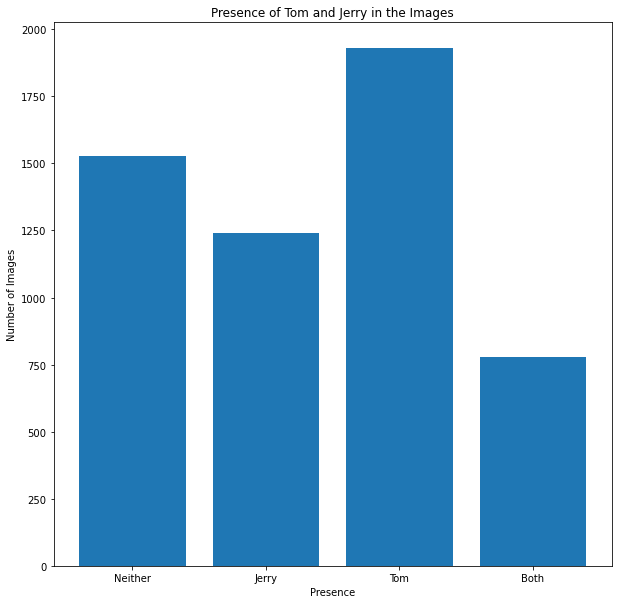

In [16]:
# create descriptive labels for each unique row from the `y` numpy array
labels = ['Neither', 'Jerry', 'Tom', 'Both']

# setup bar chart and its texts
plt.bar(labels, num_of_imgs)
plt.title("Presence of Tom and Jerry in the Images")
plt.xlabel("Presence")
plt.ylabel("Number of Images")

# display bar chart
plt.show()

As observed from the results, there are `1930` images wherein **only Tom** is **present**, `1240` images wherein **only Jerry** is **present**, `780` images wherein **both** are **present**, and `1528` images wherein **neither** of them are **present**.

##### **_Viewing a sampling of images_**

To familiarize ourselves with the data, lets randomly view `20` images from the dataset.

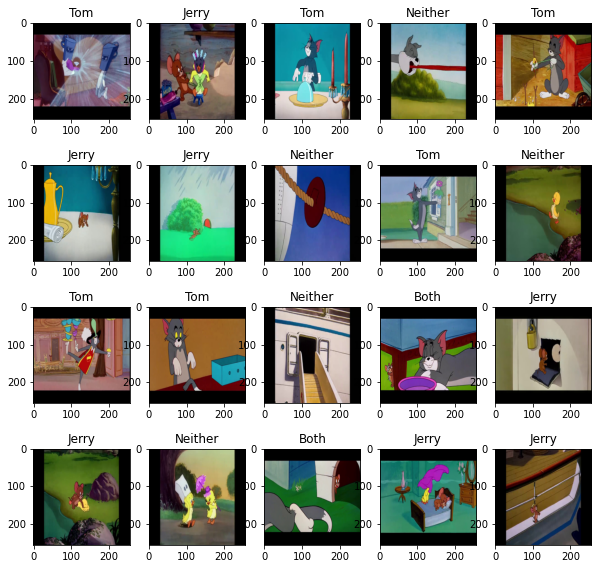

In [21]:
# display 20 random images from the dataset along with their ground truth class labels
for i in range(20):
    idx = np.random.randint(len(X))
    ax=plt.subplot(4, 5, i+1)
    
    # get descriptive class label
    if y[idx][0] == 0 and y[idx][1] == 0:
        classes = 'Neither'
    elif y[idx][0] == 0 and y[idx][1] == 1:
        classes = 'Jerry'
    elif y[idx][0] == 1 and y[idx][1] == 0:
        classes = 'Tom'
    else:
        classes = 'Both'
    
    # set descriptive label and display image
    ax.title.set_text(classes)
    plt.imshow(X[idx])

As observed above, we can see that the Tom and Jerry images have varying `brightnesses` and `backgrounds`. There are also different orientations per image, some images are shown in `portrait` while some images are shown in `landscape`. 

There are also images wherein only certain body parts of Tom or Jerry are shown such as their `tail` or `hands`, yet the ground truth class label for those images indicate that Tom or Jerry is **present** in that image. 

These observations will be useful later on in this notebook, as we determine and analyze the performance of the models that we will build to perform the task.

## **Model Training**

The model that we are going to build to perform **multi-label** image classification on the dataset is a `Convolutional Neural Network (CNN)`. 



## **Hyperparameter Tuning**

## **Model Selection**

## **Insights and Conclusion**

## **References**

Below are the references that we have used throughout the progression of this notebook.

##### **TODO: APA citation format the references.** Delete this cell after doing the task.

* [Tom and Jerry Image Classification Dataset (Kaggle)](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)
* [EDA for Image Classification](https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a)
* [Basic EDA with Images](https://www.kaggle.com/code/jpmiller/basic-eda-with-images/notebook)
* [Multi-label image classification vs. object detection](https://stackoverflow.com/questions/66337588/multi-label-image-classification-vs-object-detection)
* [Multilabel Image Classification using Deep Learning](https://www.mathworks.com/help/deeplearning/ug/multilabel-image-classification-using-deep-learning.html)
* [Multi-Label Image Classification Classification with Neural Network | Keras](https://towardsdatascience.com/multi-label-image-classification-with-neural-network-keras-ddc1ab1afede)